In [385]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math
epsI = 0.005
epsB = 0.015
U0 = [3, 5, 7, 9, 13, 15, 17]
L34z = 0.004
Lz = 0.01
hz = 0.08*0.001
hs = 0.07*0.001
I = [0.19, 0.29, 0.39, 0.5, 0.74, 0.84, 0.99]
udel = 3 / 75


In [386]:
def line(x, a, b):
    return a * x + b

In [387]:
B = pd.read_csv('B(I).csv', sep = ';')
B['B'] *= 0.001
B['sigmaB'] = B['B'] * epsB
B['sigmaI'] = B['I'] * epsI
params, cov = curve_fit(line, xdata=B['I'], ydata=B['B'])
k = params[0]
b = params[1]
sigmak = cov[0][0]**(1/2)
sigmab = cov[0][0]**(1/2)
print(f'Угловой коэффициент калибровочного графика - {k}, свободный член - {b}')

Угловой коэффициент калибровочного графика - 0.7466983298518699, свободный член - 0.1250625100586238


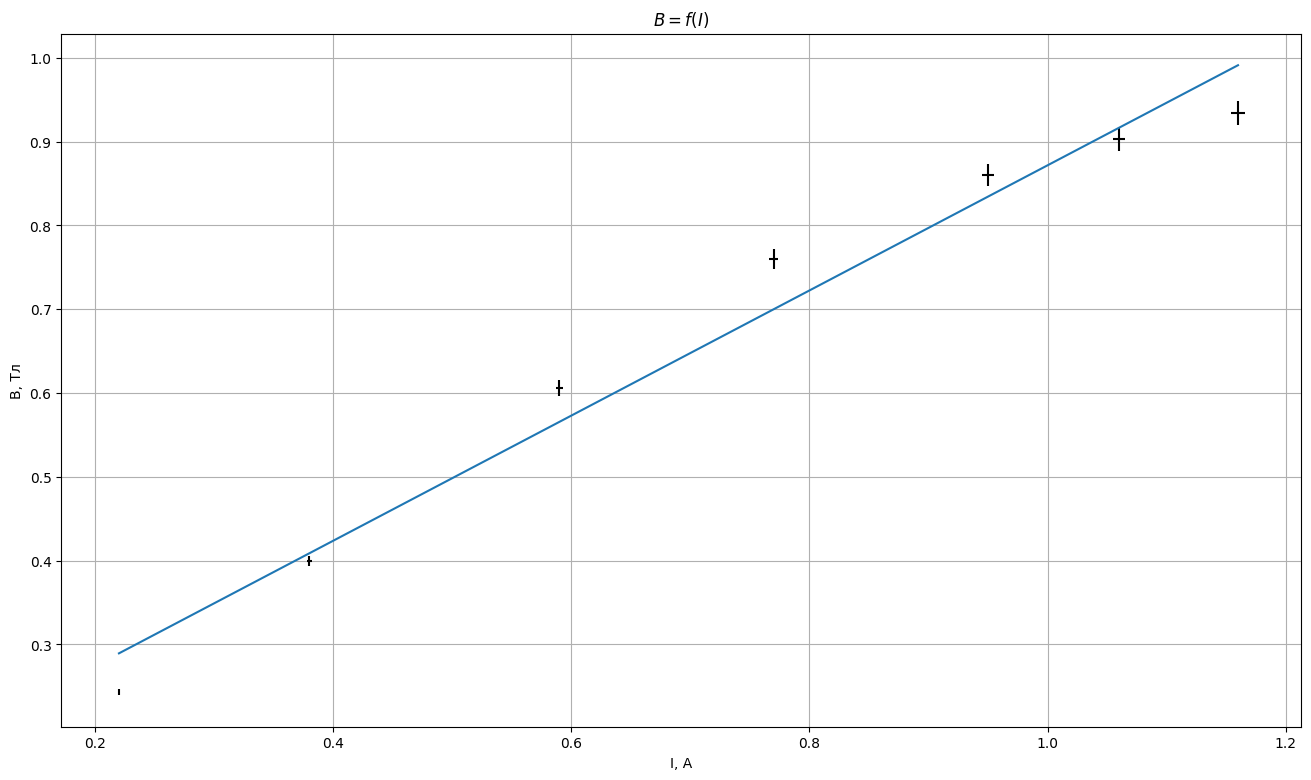

In [388]:
fig, ax = plt.subplots(figsize = (16, 9))
x = [B['I'][0], B['I'][6]]
y = [params[0] * i + params[1] for i in x]
plt.errorbar(B['I'], B['B'], xerr = B['sigmaI'], yerr = B['sigmaB'], c = 'black', fmt = 'None')
plt.grid()
plt.title('$B = f(I)$')
plt.xlabel('I, A')
plt.ylabel('B, Тл')
plt.plot(x, y)
plt.show()

In [389]:
tables = {}
for i in range (1, 8):
    tables[f'U{i}'] = pd.read_csv(f'I{i}.csv', sep = ';')
U1 = tables['U1']
U2 = tables['U2']
U3 = tables['U3']
U4 = tables['U4']
U5 = tables['U5']
U6 = tables['U6']
U7 = tables['U7']
U = [U1, U2, U3, U4, U5, U6, U7]
U2

,I,U
0,0.15,7
1,0.30,8
2,0.45,10
3,0.60,12
4,0.75,13
5,0.90,14
6,1.05,15


In [390]:
for i in range (len(U)):
    U[i]['U'] -= U0[i]
eps1 = math.sqrt((sigmak/k)**2 + (epsI)**2)
for i in range (len(U)):
    U[i]['B'] = k * U[i]['I'] + b
    U[i]['sigmaB'] = U[i]['B'] * eps1
    U[i]['sigmaI'] = U[i]['I'] * epsI
    U[i]['sigmaU'] = 0.5
    U[i]['U'] *= udel
    U[i]['sigmaU'] *= udel
U1

,I,U,B,sigmaB,sigmaI,sigmaU
0,0.15,0.04,0.237067,0.017720,0.00075,0.02
1,0.31,0.08,0.356539,0.026650,0.00155,0.02
2,0.46,0.12,0.468544,0.035022,0.00230,0.02
3,0.61,0.16,0.580548,0.043394,0.00305,0.02
4,0.75,0.20,0.685086,0.051208,0.00375,0.02
5,0.90,0.24,0.797091,0.059580,0.00450,0.02
6,1.05,0.24,0.909096,0.067953,0.00525,0.02


In [391]:
ks = []
sigmaks = []
bs = []
sigmabs = []
for i in range (len(U)):
    params, cov = curve_fit(line, xdata = U[i]['B'], ydata = U[i]['U'])
    ks.append(params[0])
    bs.append(params[1])
    sigmaks.append(cov[0][0]**(1/2))
    sigmabs.append(cov[1][1]**(1/2))
U7

,I,U,B,sigmaB,sigmaI,sigmaU
0,0.16,0.20,0.244534,0.018278,0.00080,0.02
1,0.30,0.40,0.349072,0.026092,0.00150,0.02
2,0.45,0.56,0.461077,0.034464,0.00225,0.02
3,0.61,0.80,0.580548,0.043394,0.00305,0.02
4,0.75,0.96,0.685086,0.051208,0.00375,0.02
5,0.91,1.08,0.804558,0.060139,0.00455,0.02
6,1.05,1.16,0.909096,0.067953,0.00525,0.02


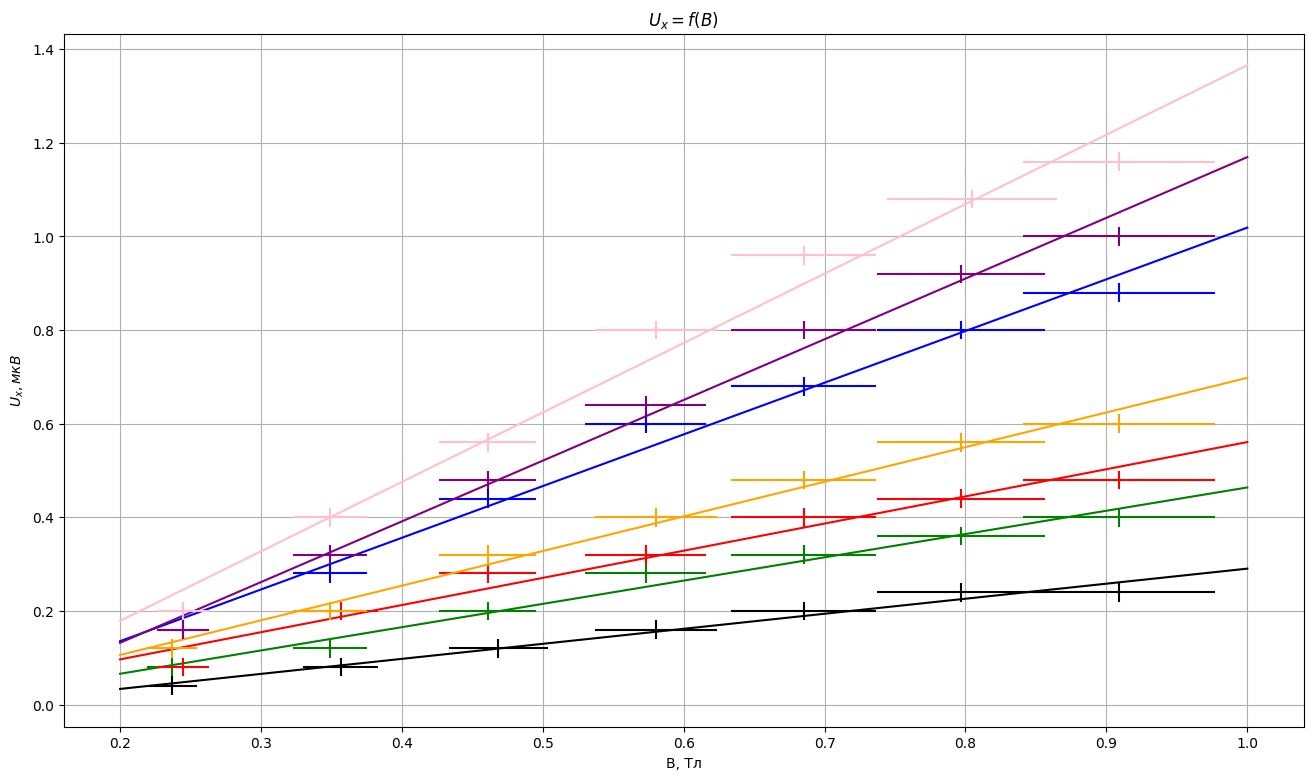

In [392]:
fig, ax = plt.subplots(figsize = (16,9))
x = [0.2, 1.0]
colors = ['black', 'green', 'red', 'orange', 'blue', 'purple', 'pink']
plt.grid()
for i in range (len(U)):
    plt.errorbar(U[i]['B'], U[i]['U'], xerr = U[i]['sigmaB'], yerr = U[i]['sigmaU'], fmt = 'None', color = colors[i])
    y = [ks[i] * e + bs[i] for e in x]
    plt.plot(x, y, color = colors[i])
plt.title('$U_x = f(B)$')
plt.xlabel('B, Тл')
plt.ylabel('$U_x, мкВ$')
plt.show()

In [393]:
K = pd.DataFrame(data = {'k': ks, 'I': I, 'sigmak': sigmaks})
K['sigmaI'] = K['I'] * epsI
params, cov = curve_fit(line, xdata = K['I'], ydata = K['k'])
print(f'Угловой коэффициент зависимости K(I): {params[0]} мкОм/Тл')
print(f'Постоянная Холла равна: {np.round(- params[0] * 0.7,1)}e-10 м3/Кл', f'погрешность: {0.1}e-10 м3/Кл')
Rs = (- params[0] * 0.7)
sigmaRs = 0.1
Rs

Угловой коэффициент зависимости K(I): 1.4617733484167805 мкОм/Тл
Постоянная Холла равна: -1.0e-10 м3/Кл погрешность: 0.1e-10 м3/Кл


-1.0232413438917463

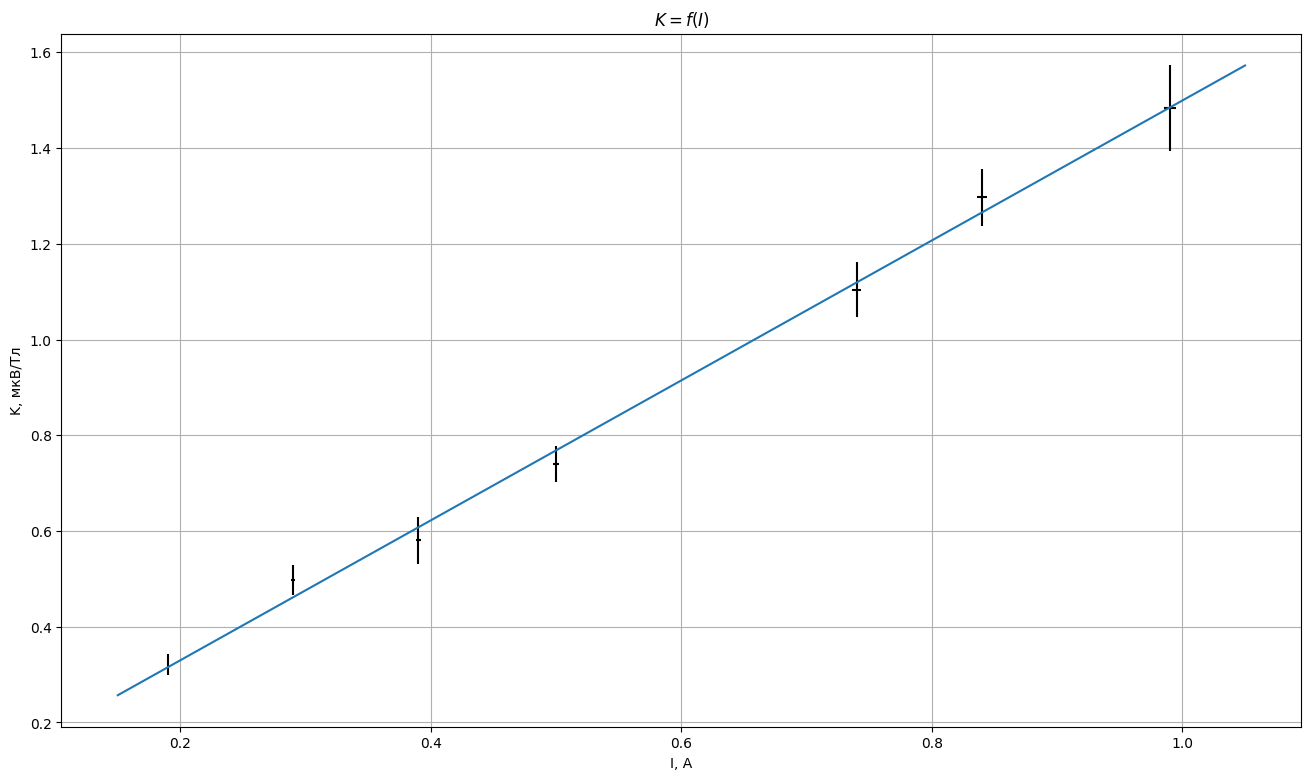

In [394]:
fig, ax = plt.subplots(figsize = (16, 9))
x = [0.15, 1.05]
y = [params[0] * i + params[1] for i in x]
plt.errorbar(K['I'], K['k'], xerr = K['sigmaI'], yerr = K['sigmak'], fmt = 'None', color = 'black')
plt.grid()
plt.title('$K = f(I)$')
plt.xlabel('I, A')
plt.ylabel('K, мкВ/Тл')
plt.plot(x, y)
plt.show()

In [395]:
Uz = pd.read_csv('Iz.csv', sep = ';')
Uz['U'] -= 17
Uz['U'] *= udel
Uz['B'] = k * Uz['I'] + b
Uz['sigmaB'] = Uz['B'] * eps1
Uz['sigmaU'] = abs(0.5*udel)
params, cov = curve_fit(line, xdata = Uz['B'], ydata = Uz['U'])
print(f'Постоянная Холла для цинка равна: {-params[0]*0.5}e-10 м3/Кл', f'погрешность: {0.1}e-10 м3/Кл')
Rz = (- params[0] * 0.5)
sigmaRz = cov[0][0]**(1/2)*0.5
Rz, sigmaRz

Постоянная Холла для цинка равна: 0.6058416548922994e-10 м3/Кл погрешность: 0.1e-10 м3/Кл


(0.6058416548922994, 0.0385812299609782)

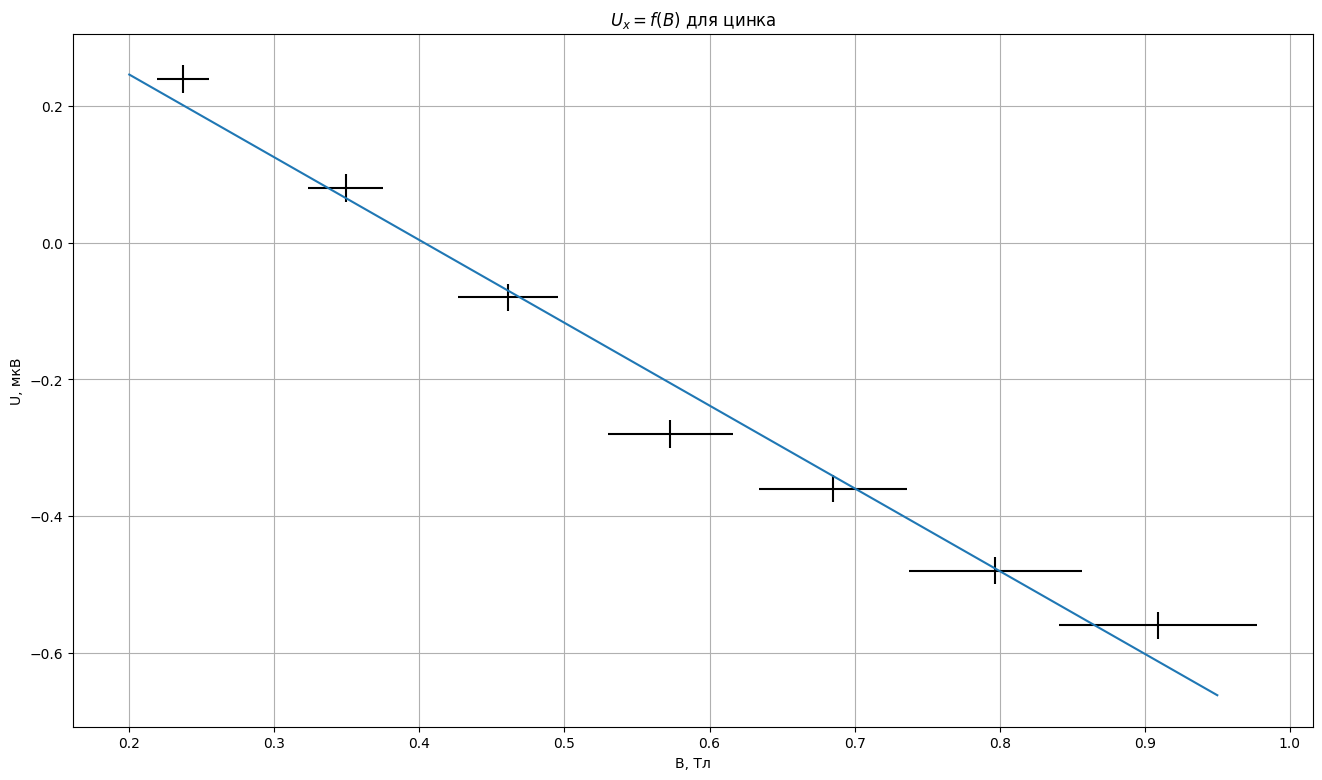

In [396]:
fig, ax = plt.subplots(figsize = (16,9))
x = [0.2, 0.95]
y = [params[0] * i + params[1] for i in x]
plt.errorbar(Uz['B'], Uz['U'], xerr = Uz['sigmaB'], yerr = Uz['sigmaU'], color = 'black', fmt = 'None')
plt.plot(x, y)
plt.grid()
plt.title('$U_x = f(B)$ для цинка')
plt.xlabel('B, Тл')
plt.ylabel('U, мкВ')
plt.show()

In [404]:
ns = 1 / (-1.6*10**(-19) * Rs * 10**(-10))
sigmans = ns * 0.1
nz = 1 / (1.6*10**(-19) * Rz * 10**(-10))
sigmanz = nz * (sigmaRz)/(Rz)
ns, sigmans, nz, sigmanz, Rz

(6.1080409204626685e+28,
 6.108040920462669e+27,
 1.031622693740176e+29,
 6.569583332336071e+27,
 0.6058416548922994)

In [405]:
print(f'Концентрация носителей заряда в серебре: {6.1} ± {0.6}, 10^28 1/м3')
print(f'Концентрация носителей заряда в цинке: {1.0} ± {0.1}, 10^29 1/м3')

Концентрация носителей заряда в серебре: 6.1 ± 0.6, 10^28 1/м3
Концентрация носителей заряда в цинке: 1.0 ± 0.1, 10^29 1/м3


In [399]:
uz = 34 * 10
us = 27 * 10
udz = (1.01 * 0.004) / (uz * 10**(-6) * 0.01 * 0.08 * 10**(-3))
#uds = (1.07 * 0.071) / (us * 10**(-6) * 0.0 * 0.08 * 10**(-3))
sigmaudz = udz * (0.5)/(34)
print(f'Удельная проводимость цинка равна: {1.5}e+7 ± {0.2}e+7, 1/Ом*м')
udz

Удельная проводимость цинка равна: 1.5e+8 ± 0.2e+8, 1/Ом*м


14852941.176470589

In [401]:
print(f'Подвижность зарядов цинка равняется: {udz * Rz/10**6} ± {udz * Rz/10**6 * ((sigmaudz/udz)**2 + (sigmaRz/Rz)**2)**(1/2)} см2/В*с' )

Подвижность зарядов цинка равняется: 8.998530462370917 ± 0.5881257127748803 см2/В*с
